In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
import os
import zipfile
import pandas as pd

# Step 1: Define paths
zip_path = "/content/archive.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Files extracted to:", extract_path)
print(" Extracted files:", os.listdir(extract_path))

csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv")]
print(" CSV files found:", csv_files)

if csv_files:
    file_path = os.path.join(extract_path, csv_files[0])
    df = pd.read_csv(file_path)
    print("\n Dataset loaded successfully:", df.shape)
    display(df.head())
else:
    print(" No CSV files found inside the ZIP. Check your archive.")


 Files extracted to: /content/data
 Extracted files: ['Portmap-training.parquet', 'UDP-training.parquet', 'UDP-testing.parquet', 'Syn-training.parquet', 'DNS-testing.parquet', 'UDPLag-training.parquet', 'Syn-testing.parquet', 'SNMP-testing.parquet', 'LDAP-training.parquet', 'MSSQL-training.parquet', 'NetBIOS-testing.parquet', 'TFTP-testing.parquet', 'UDPLag-testing.parquet', 'MSSQL-testing.parquet', 'LDAP-testing.parquet', 'NetBIOS-training.parquet', 'NTP-testing.parquet']
 CSV files found: []
 No CSV files found inside the ZIP. Check your archive.


In [5]:
import pandas as pd
import os

data_path = "/content/data"

# List all parquet files
parquet_files = [f for f in os.listdir(data_path) if f.endswith(".parquet")]
print(" Parquet files found:", parquet_files)

if parquet_files:
    # Use the first parquet file found
    file_path = os.path.join(data_path, parquet_files[0])
    df = pd.read_parquet(file_path)

    print(" Dataset loaded successfully:", df.shape)
    display(df.head())
else:
    print(" No parquet files found in the directory.")

 Parquet files found: ['Portmap-training.parquet', 'UDP-training.parquet', 'UDP-testing.parquet', 'Syn-training.parquet', 'DNS-testing.parquet', 'UDPLag-training.parquet', 'Syn-testing.parquet', 'SNMP-testing.parquet', 'LDAP-training.parquet', 'MSSQL-training.parquet', 'NetBIOS-testing.parquet', 'TFTP-testing.parquet', 'UDPLag-testing.parquet', 'MSSQL-testing.parquet', 'LDAP-testing.parquet', 'NetBIOS-training.parquet', 'NTP-testing.parquet']
 Dataset loaded successfully: (5105, 78)


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,1,2,0,530.0,0.0,265.0,265.0,265.0,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portmap
1,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portmap
2,17,2,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portmap
3,17,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portmap
4,17,1,2,0,424.0,0.0,212.0,212.0,212.0,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portmap


In [6]:
import pandas as pd
import os

data_path = "/content/data"
all_files = [f for f in os.listdir(data_path) if f.endswith(".parquet")]

dfs = []
for f in all_files:
    file_path = os.path.join(data_path, f)
    temp_df = pd.read_parquet(file_path)

    # Extract label name from filename
    label = f.split("-")[0]  # e.g., "DDoS", "Benign", "Bruteforce"
    temp_df["Label"] = label
    dfs.append(temp_df)

# Combine into one dataset
df = pd.concat(dfs, ignore_index=True)
print(" Combined dataset shape:", df.shape)
df["Label"].value_counts()


 Combined dataset shape: (431371, 78)


,count
Label,
NTP,134674
TFTP,121833
Syn,71243
UDP,30232
UDPLag,25104
MSSQL,19057
LDAP,9546
DNS,6703
Portmap,5105


In [7]:
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int8   
 1   Flow Duration             431371 non-null  int32  
 2   Total Fwd Packets         431371 non-null  int32  
 3   Total Backward Packets    431371 non-null  int16  
 4   Fwd Packets Length Total  431371 non-null  float32
 5   Bwd Packets Length Total  431371 non-null  float32
 6   Fwd Packet Length Max     431371 non-null  float32
 7   Fwd Packet Length Min     431371 non-null  float32
 8   Fwd Packet Length Mean    431371 non-null  float32
 9   Fwd Packet Length Std     431371 non-null  float32
 10  Bwd Packet Length Max     431371 non-null  float32
 11  Bwd Packet Length Min     431371 non-null  float32
 12  Bwd Packet Length Mean    431371 non-null  float32
 13  Bwd Packet Length Std     431371 non-null  f

,0
Protocol,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Fwd Packets Length Total,0
Bwd Packets Length Total,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0


In [8]:
df = df.dropna()
print(" After cleaning:", df.shape)


 After cleaning: (431371, 78)


In [9]:
df['Label'].value_counts()


,count
Label,
NTP,134674
TFTP,121833
Syn,71243
UDP,30232
UDPLag,25104
MSSQL,19057
LDAP,9546
DNS,6703
Portmap,5105


In [10]:
df['Label'] = df['Label'].apply(lambda x: 'Normal' if x == 'Benign' else 'Attack')
df['Label'].value_counts()


,count
Label,
Attack,431371


In [11]:
X = df.drop(columns=['Label'])
y = df['Label']


In [12]:

df.drop_duplicates(inplace=True)

df = df.dropna(subset=['Label'])


Label
Attack    418884
Name: count, dtype: int64


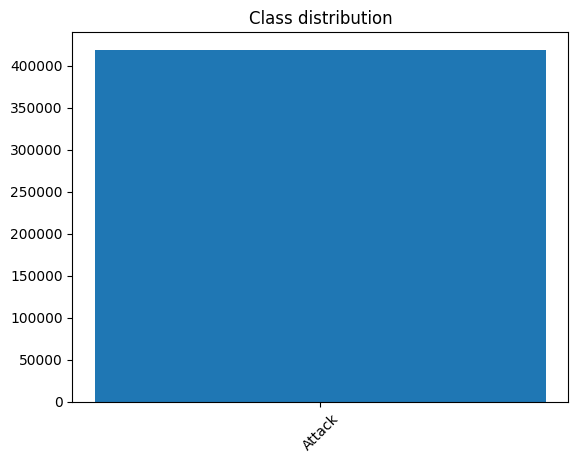

In [13]:
print(df['Label'].value_counts())
plt.bar(df['Label'].value_counts().index, df['Label'].value_counts().values)
plt.xticks(rotation=45); plt.title("Class distribution")
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (345096, 77)
Test set: (86275, 77)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

print(" Model training complete!")


 Model training complete!


📈 Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     86275

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


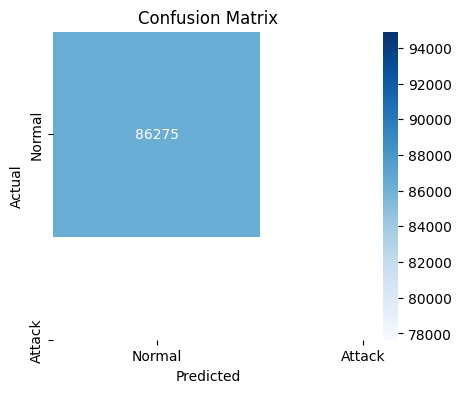

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf.predict(X_test)

print("📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Attack'], yticklabels=['Normal','Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


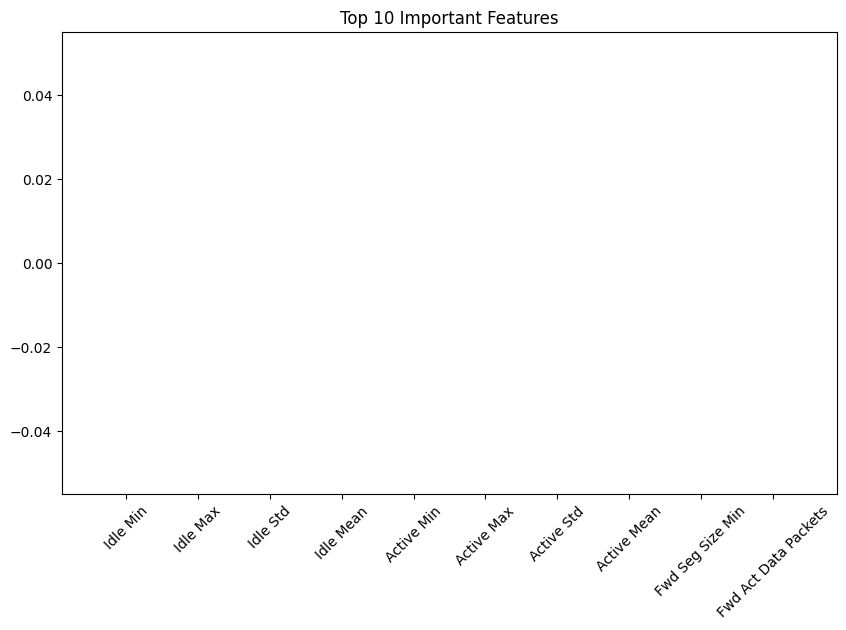

In [19]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.show()


In [20]:
import joblib

joblib.dump(rf, "random_forest_ids_model.joblib")
print(" Model saved successfully!")


 Model saved successfully!
